# K Nearest Neighbors Project 

In [14]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
df = pd.read_csv('KNN_Project_Data')


In [18]:
df.head()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC,TARGET CLASS
0,1636.670614,817.988525,2565.995189,358.347163,550.417491,1618.870897,2147.641254,330.727893,1494.878631,845.136088,0
1,1013.402760,577.587332,2644.141273,280.428203,1161.873391,2084.107872,853.404981,447.157619,1193.032521,861.081809,1
2,1300.035501,820.518697,2025.854469,525.562292,922.206261,2552.355407,818.676686,845.491492,1968.367513,1647.186291,1
3,1059.347542,1066.866418,612.000041,480.827789,419.467495,685.666983,852.867810,341.664784,1154.391368,1450.935357,0
4,1018.340526,1313.679056,950.622661,724.742174,843.065903,1370.554164,905.469453,658.118202,539.459350,1899.850792,0


# EDA

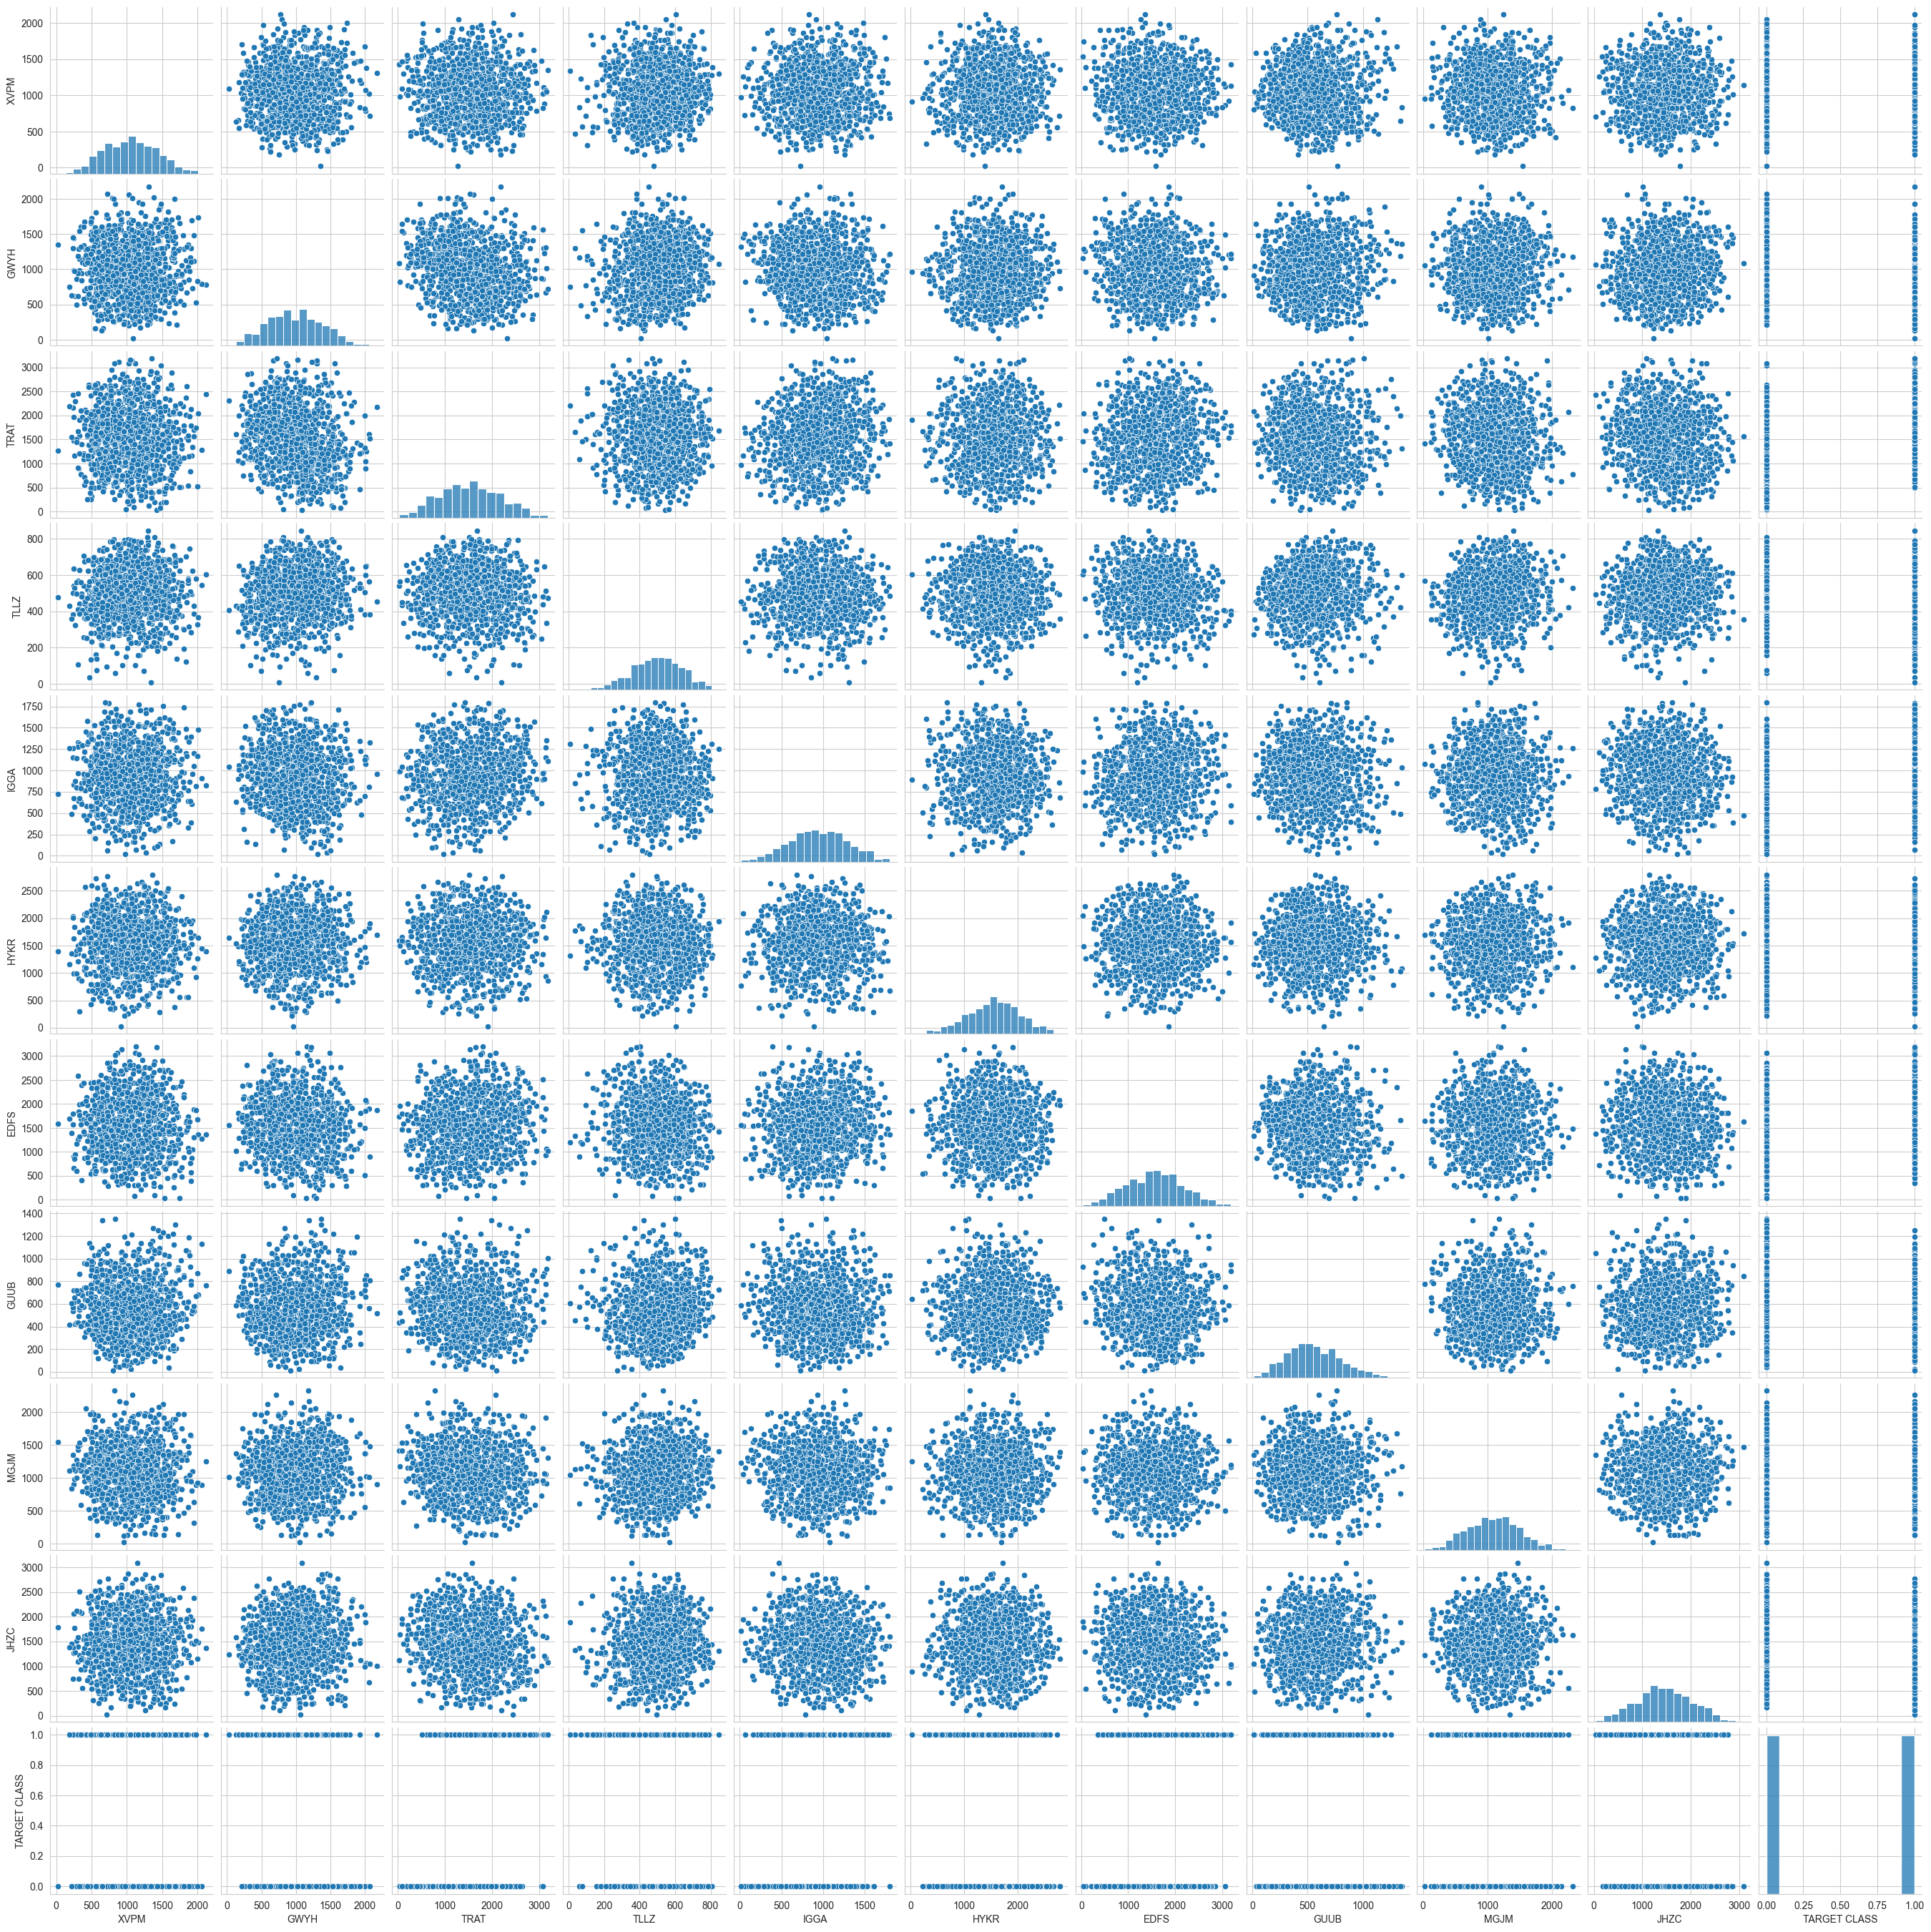

In [21]:
sns.set_style('whitegrid')
sns.pairplot(df)

# Standardizing the Variables

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler()

In [25]:
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis = 1))

In [29]:
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.tail()

,XVPM,GWYH,TRAT,TLLZ,IGGA,HYKR,EDFS,GUUB,MGJM,JHZC
995,0.776682,0.758234,-1.753322,0.507699,0.174588,-1.279354,-1.797957,0.431419,0.088717,1.188886
996,-0.313446,0.385206,0.885502,-0.083136,-1.208486,0.309242,0.746346,-0.112571,-1.763636,-1.559081
997,-0.358895,-0.979015,0.837715,0.014018,-1.397424,0.054473,0.164120,-1.514726,-0.275122,0.864287
998,0.275080,-0.992399,0.030371,1.062954,1.142871,-0.192872,2.051386,-0.036233,0.436685,-0.212456
999,0.625896,0.795109,1.121800,1.185944,0.555582,-1.133032,0.746559,-1.251565,-0.603529,-0.879859


In [31]:
from sklearn.model_selection import train_test_split
X = df_feat
y = df['TARGET CLASS']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [33]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)
pred_o = knn.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix,classification_report
print(confusion_matrix(y_test,pred_o))
print(classification_report(y_test,pred_o))

[[109  43]
 [ 41 107]]
              precision    recall  f1-score   support

           0       0.73      0.72      0.72       152
           1       0.71      0.72      0.72       148

    accuracy                           0.72       300
   macro avg       0.72      0.72      0.72       300
weighted avg       0.72      0.72      0.72       300



# Choosing a K Value using elbow method

In [38]:
error_values = []
for i in range(1,40):
    nknn = KNeighborsClassifier(n_neighbors=i)
    nknn.fit(X_train,y_train)
    pred_i = nknn.predict(X_test)
    error_values.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

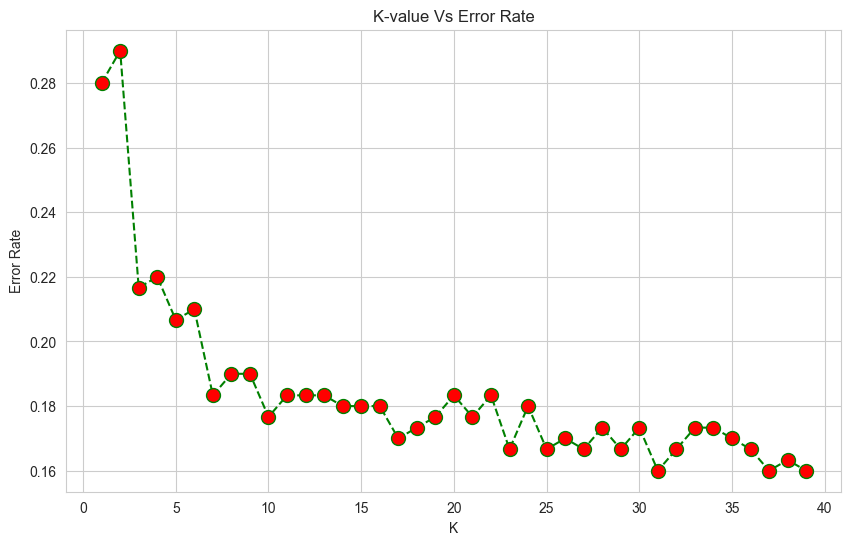

In [40]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_values,color = 'green',linestyle = 'dashed', marker= 'o',markerfacecolor = 'red',markersize=10)
plt.title('K-value Vs Error Rate')
plt.xlabel('K')
plt.ylabel('Error Rate')

### Selected n=31 (since it has least number of errors)

In [44]:
nknn = KNeighborsClassifier(n_neighbors=31)
nknn.fit(X_train,y_train)
pred = nknn.predict(X_test)
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[123  29]
 [ 19 129]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84       152
           1       0.82      0.87      0.84       148

    accuracy                           0.84       300
   macro avg       0.84      0.84      0.84       300
weighted avg       0.84      0.84      0.84       300

